In [1]:
import tensorflow as tf
import keras
import pandas
import sklearn
import matplotlib
import pandas as pd

df = pd.read_csv('/kaggle/input/dartmouthcourses/Dartmouth - Courses.csv')
df

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Year,Term Number,Department,Course Number,Number of Sections,Enrollments,Median GPA Points,Average Section Size
0,NaN,NaN,AAAS,31.10,1.0,14.0,4.000000,14.0
1,2021.0,3.0,AAAS,31.90,1.0,17.0,4.000000,17.0
2,2021.0,3.0,AAAS,60.01,1.0,19.0,3.666667,NaN
3,2021.0,3.0,AAAS,62.75,1.0,29.0,4.000000,29.0
4,2021.0,3.0,AAAS,65.65,1.0,16.0,3.333333,16.0
...,...,...,...,...,...,...,...,...
1555,2022.0,2.0,WRIT,7.34,1.0,16.0,3.833333,16.0
1556,2022.0,2.0,WRIT,7.35,1.0,16.0,4.000000,16.0
1557,NaN,2.0,WRIT,7.36,1.0,16.0,3.666667,16.0
1558,2022.0,2.0,WRIT,7.37,2.0,30.0,4.000000,15.0


In [2]:
df = df.fillna(df.mean())

/tmp/ipykernel_20/114435927.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [3]:
df

,Year,Term Number,Department,Course Number,Number of Sections,Enrollments,Median GPA Points,Average Section Size
0,2021.623219,2.358974,AAAS,31.10,1.0,14.0,4.000000,14.000000
1,2021.000000,3.000000,AAAS,31.90,1.0,17.0,4.000000,17.000000
2,2021.000000,3.000000,AAAS,60.01,1.0,19.0,3.666667,26.249205
3,2021.000000,3.000000,AAAS,62.75,1.0,29.0,4.000000,29.000000
4,2021.000000,3.000000,AAAS,65.65,1.0,16.0,3.333333,16.000000
...,...,...,...,...,...,...,...,...
1555,2022.000000,2.000000,WRIT,7.34,1.0,16.0,3.833333,16.000000
1556,2022.000000,2.000000,WRIT,7.35,1.0,16.0,4.000000,16.000000
1557,2021.623219,2.000000,WRIT,7.36,1.0,16.0,3.666667,16.000000
1558,2022.000000,2.000000,WRIT,7.37,2.0,30.0,4.000000,15.000000


In [4]:
selected_columns = ['Year', 'Term Number', 'Department', 'Number of Sections', 'Enrollments', 'Average Section Size', 'Median GPA Points']
df1 = df[selected_columns]

df1

,Year,Term Number,Department,Number of Sections,Enrollments,Average Section Size,Median GPA Points
0,2021.623219,2.358974,AAAS,1.0,14.0,14.000000,4.000000
1,2021.000000,3.000000,AAAS,1.0,17.0,17.000000,4.000000
2,2021.000000,3.000000,AAAS,1.0,19.0,26.249205,3.666667
3,2021.000000,3.000000,AAAS,1.0,29.0,29.000000,4.000000
4,2021.000000,3.000000,AAAS,1.0,16.0,16.000000,3.333333
...,...,...,...,...,...,...,...
1555,2022.000000,2.000000,WRIT,1.0,16.0,16.000000,3.833333
1556,2022.000000,2.000000,WRIT,1.0,16.0,16.000000,4.000000
1557,2021.623219,2.000000,WRIT,1.0,16.0,16.000000,3.666667
1558,2022.000000,2.000000,WRIT,2.0,30.0,15.000000,4.000000


In [5]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the LabelEncoder object to the department column
encoder.fit(df1['Department'])

# Transform the department column
df1['Department'] = encoder.transform(df1['Department'])
df1

/tmp/ipykernel_20/153527717.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Department'] = encoder.transform(df1['Department'])


,Year,Term Number,Department,Number of Sections,Enrollments,Average Section Size,Median GPA Points
0,2021.623219,2.358974,0,1.0,14.0,14.000000,4.000000
1,2021.000000,3.000000,0,1.0,17.0,17.000000,4.000000
2,2021.000000,3.000000,0,1.0,19.0,26.249205,3.666667
3,2021.000000,3.000000,0,1.0,29.0,29.000000,4.000000
4,2021.000000,3.000000,0,1.0,16.0,16.000000,3.333333
...,...,...,...,...,...,...,...
1555,2022.000000,2.000000,57,1.0,16.0,16.000000,3.833333
1556,2022.000000,2.000000,57,1.0,16.0,16.000000,4.000000
1557,2021.623219,2.000000,57,1.0,16.0,16.000000,3.666667
1558,2022.000000,2.000000,57,2.0,30.0,15.000000,4.000000


In [6]:
dataset = df1.values
dataset

array([[2.02162322e+03, 2.35897436e+00, 0.00000000e+00, ...,
        1.40000000e+01, 1.40000000e+01, 4.00000000e+00],
       [2.02100000e+03, 3.00000000e+00, 0.00000000e+00, ...,
        1.70000000e+01, 1.70000000e+01, 4.00000000e+00],
       [2.02100000e+03, 3.00000000e+00, 0.00000000e+00, ...,
        1.90000000e+01, 2.62492048e+01, 3.66666667e+00],
       ...,
       [2.02162322e+03, 2.00000000e+00, 5.70000000e+01, ...,
        1.60000000e+01, 1.60000000e+01, 3.66666667e+00],
       [2.02200000e+03, 2.00000000e+00, 5.70000000e+01, ...,
        3.00000000e+01, 1.50000000e+01, 4.00000000e+00],
       [2.02200000e+03, 2.00000000e+00, 5.70000000e+01, ...,
        1.60000000e+01, 1.60000000e+01, 3.78462811e+00]])

In [7]:
X = dataset[:,0:6]
X

Y = dataset[:,6]
Y

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_scale

array([[0.62321937, 0.45299145, 0.        , 0.        , 0.00343348,
        0.01777778],
       [0.        , 0.66666667, 0.        , 0.        , 0.00600858,
        0.03111111],
       [0.        , 0.66666667, 0.        , 0.        , 0.00772532,
        0.07221869],
       ...,
       [0.62321937, 0.33333333, 0.98275862, 0.        , 0.00515021,
        0.02666667],
       [1.        , 0.33333333, 0.98275862, 0.03125   , 0.01716738,
        0.02222222],
       [1.        , 0.33333333, 0.98275862, 0.        , 0.00515021,
        0.02666667]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [9]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1092, 6) (234, 6) (234, 6) (1092,) (234,) (234,)


In [10]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(6,)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear'),
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
35/35 [==============================] - 1s 8ms/step - loss: 13.3069 - mae: 3.6358 - val_loss: 10.8975 - val_mae: 3.2903
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 8.2875 - mae: 2.8463 - val_loss: 4.8375 - val_mae: 2.1595
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 2.4009 - mae: 1.3848 - val_loss: 0.6634 - val_mae: 0.6483
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5251 - mae: 0.5926 - val_loss: 0.5120 - val_mae: 0.5849
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4273 - mae: 0.5337 - val_loss: 0.4311 - val_mae: 0.5281
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3667 - mae: 0.4911 - val_loss: 0.3789 - val_mae: 0.4883
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3232 - mae: 0.4576 - val_loss: 0.3367 - val_mae: 0.4541
Epoch 8/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2868 -

In [11]:
model.evaluate(X_test, Y_test)[1]

8/8 [==============================] - 0s 2ms/step - loss: 0.0641 - mae: 0.2127


0.2126535326242447

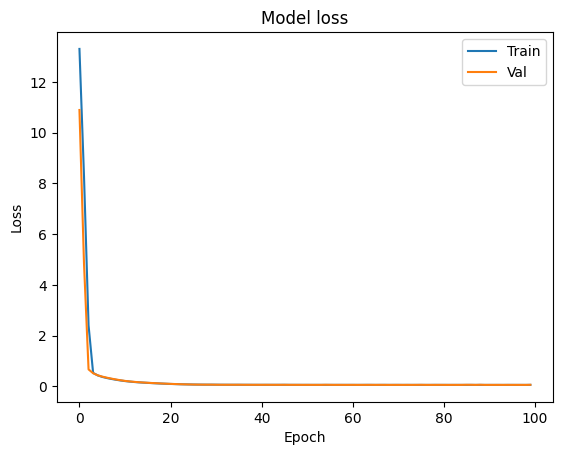

In [12]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()